# Numerical Errors: Roundoff and Truncation

We will consider 2 different types of errors:

* **roundoff error**: an error arising from how numbers are represented on computers.
* **truncation error**: an error that arises from approximations we make in turning math operations (like derivatives) into discrete operations that can be done on a computer.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Roundoff Error

Computers use finite amount of memory (64-bits for double precision) to store floating point numbers.  This means that we cannot represent the infinite set of numbers in the number line in a finite amount of memory.  So most numbers are approximate after a certain number of digits.

<div class="alert alert-block alert-info">

**Exercise:**
    
What is (approximately) the smallest number that can be added to `1` such that the result is still distinct from `1`
    
</div>

In [2]:
a = 1.0
eps = 0.1
while a + eps != a:
    eps /= 2.0

# note: eps is now the first value such that 1 + eps is not equal to 1
# so 2*eps is the last value for which they were distinct
print(2*eps)

1.7763568394002506e-16


Math is not associative in floating point.  Consider 

$$(a + b) + c$$

vs 

$$a + (b + c)$$

with $a = 1.0$, $b = -1.0$, and $c = 2.e-15$.

Do these two expressions agree?

In [3]:
a = 1.0
b = -1.0
c = 2.e-15

print((a + b) + c)
print(a + (b + c))

2e-15
1.9984014443252818e-15


### Reducing roundoff error

Often we can reduce roundoff error by changing the order of operations or using algebraically equivalent expressions that have better roundoff properties.

For example, subtracting two very large, nearly identical numbers can result in a loss of precision.  Consider:

$$f = a^2 - b^2$$

and the equivalent

$$g = (a - b)(a + b)$$


In [4]:
# the closer together we make these numbers, the larger
# the relative error
a = 1.e18
b = 1.000000001e18

# compute the two algebraically equivalent expressions
f = a**2 - b**2
g = (a - b) * (a + b)

# print both expressions and the relative error
print(f, g, abs((f-g)/g))

-1.9999999769683095e+27 -2.000000001e+27 1.201584528005781e-08


as we make $a$ and $b$ closer together, the relative error in the calculation increases.

<div class="alert alert-block alert-info">

**Exercise:**

Consider a quadratic equation: $ax^2 + bx + c$.  The two solutions are given by the familiar quadratic equation:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
    
Alternately, we could use the expression:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$
    
For values $a = 0.001$, $b = 1000$, and $c = 0.001$, how do we use these expressions to get the most accurate answer?
    
(example from Newman)
</div>

In [5]:
a = 0.001
b = 1000.0
c = 0.001

# the problem is the sqrt of the discriminant -- it is very
# close to b, so if we subtract it and b, then we maximize
# roundoff error
print(np.sqrt(b**2 - 4*a*c), b)

# we want to choose one solution from each expression --
# the one where there is no cancellation of close numbers
x1 = 2*c/(-b - np.sqrt(b**2 - 4*a*c))
x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
print(x1, x2)

999.999999998 1000.0
-1.000000000001e-06 -999999.999999


## Truncation Error

Consider Taylor expanding a function $f(x)$:

$$f(x + h) = f(x) + h f^\prime(x) + \frac{h^2}{2} f^{\prime\prime}(x) + \ldots$$

Rearranging this, we can solve for $f^\prime(x)$:

$$f^\prime(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2} f^{\prime\prime}(x) + \ldots$$

This looks like the definition of a derivative from calculus, but with extra terms that are proportional to $h$ or higher powers of $h$.

We can write this as:

$$f^\prime(x) \approx \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)$$

where $\mathcal{O}(h)$ here means that the error in this approximation for the derivative is proportion to $h$.  We say this is *first-order accurate*.  This is an example of truncation error -- the terms we are ignoring are an error in our approximation.


<div class="alert alert-block alert-info">

**Exercise:** Relative importance of roundoff and truncation error
    
Consider a first-order approximation to the derivative:
    
$$D_h(x) = \frac{f(x+h) - f(x)}{h}$$

Consider $f(x) = \sin(x)$.  Plot the error in the approximation, $D_h(x)$, vs. $h$.  Does it do what you expect?

</div>

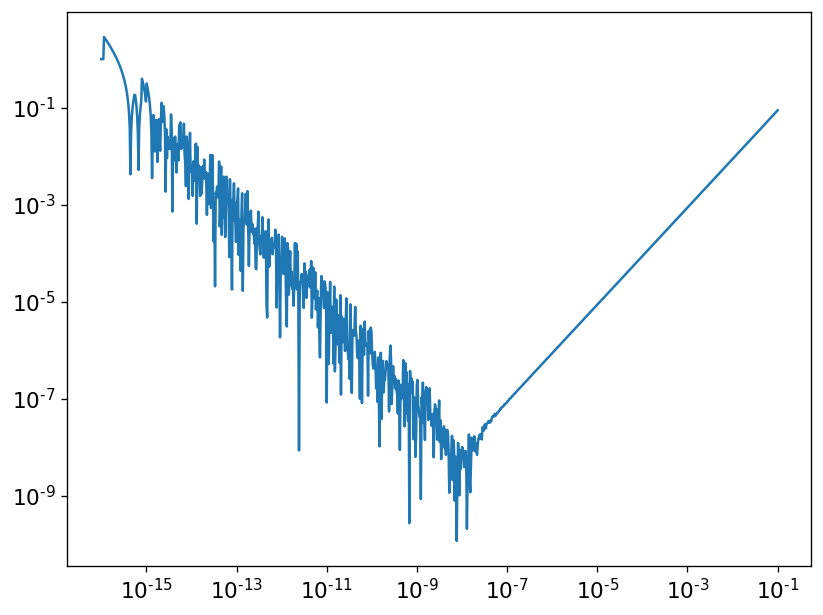

In [6]:
def f(x):
    """our function to numerically differentiate"""
    return np.sin(x)

def Dh(x, h):
    """a discrete approximation to the derivative at x"""
    return (f(x+h) - f(x))/h

def fprime(x):
    """the analytic derivative of f"""
    return np.cos(x)

# generate a set of h's from 1.e-16 to 0.1
hs = np.logspace(-16, -1, 1000)

# we'll look at the error at pi/3
x = np.pi/3.0

# compute the numerical difference for all h's
num_der = Dh(x, hs)

# get the analytic derivative
ans = fprime(x)

# compute the relative error
err = np.abs(num_der - ans)/ans

# plot the error vs h
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(hs, err)

Let's discuss the trends:

* Starting with the largest value of $\Delta x$, as 
  we make $\Delta x$ smaller, we see that the error decreases.
  This is following the expected behavior of the truncation error
  derived above.

* Once our $\Delta x$ becomes really small, roundoff error starts
  to dominate.  In effect, we are seeing that:

  $$(x_0 + \Delta x) - x_0 \ne 0$$

  because of roundoff error.

* The minimum error here is around $\sqrt{\epsilon}$, where $\epsilon$ is
  machine epsilon.

## Testing for Equality

Because of roundoff error, we should never exactly compare two floating point numbers,
but instead ask they they agree within some tolerance, e.g., test equality as:

$$| x - y | < \epsilon$$


## Other Errors

### Overflow

The finite amount of memory used for storing numbers means that there is a maximum and minimum possible number representable as well.

<img src="https://imgs.xkcd.com/comics/cant_sleep.png">

(credit: xkcd)

### NaN and Inf

These are defined "numbers" that represent floating point errors.  Consider:

Some NaNs: $\sqrt{-1}$, $0/0$, ...

Some infs: $1/0$

In [7]:
# the largest exponent we can store in double precision 
# floating point is 308.  What happens if we go beyond that?
a = 1.e308
print(a*10)

inf
